Notebook that collects data from Erich Friedman's research on _["Packing Unit Squares in Squares"](https://erich-friedman.github.io/packing/squinsqu/)_ and plots the mapping between numbers of unit squares and area of the smallest square in which they can be packed. 

# 01) import libraries

In [1]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup

import seaborn as sns
import statsmodels.api as sm

# 02) scrape table

In [9]:
site_url = "https://erich-friedman.github.io/packing/squinsqu/"
response = requests.get(site_url)
html_doc = response.content
soup = BeautifulSoup(html_doc, 'html.parser')

print(soup.prettify()[:500])

<!DOCTYPE html public "-//IETF//DTD HTML//EN">
<html>
 <head>
  <title>
   Squares in Squares
  </title>
 </head>
 <body bgcolor="#FFFFFF">
  <center>
   <font size="+4">
    Squares in Squares
   </font>
  </center>
  <p>
   <font size="+1">
    The following pictures show n unit squares packed inside the smallest known square (of side length s).  For the  n  not pictured, the trivial packing (with no tilted squares) is the best known packing.
    <p>
     <hr/>
     <p>
      <table border="0"


# 04) parse results

In [10]:
res_squares = []
res_areas = []

for i,match in enumerate(soup.find_all(string=re.compile("^[\d]+\.$"))):
    match = match.strip()
    match = match[:-1]
    
    res_squares.append(int(match))


for i,match in enumerate(soup.find_all(string=re.compile("(s =.*)"))):
    match = match[3:]                       # remove "s ="
    if match.find("=") > 1:                 # remove analytical expression
        match = match[match.find("=")+2:]
    if match[-1] == "+":                    # remove trailing "+" symbol
        match = match[:-1]
    match = match.strip()

    res_areas.append(float(match))

data = pd.DataFrame({"squares":res_squares, "area":res_areas})

<AxesSubplot:xlabel='squares', ylabel='area'>

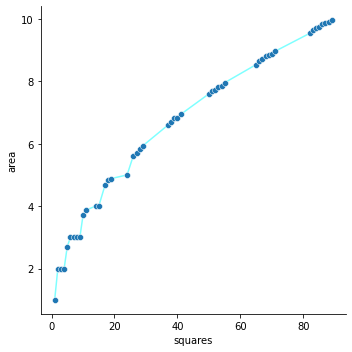

In [11]:
# sns.set(rc={'figure.figsize':(12,12)})
sns.relplot(data = data, x = "squares", y = "area", zorder = 100)
sns.lineplot(data = data, x = "squares", y = "area", color = "aqua", alpha = 0.5, zorder = 99)

# 05) export

In [5]:
data.to_excel("squares_in_squares.xlsx", index = False)
print("File exported successfully!")

File exported successfully!
